## Income Distribution

- https://www.theguardian.com/commentisfree/2011/nov/11/occupy-movement-wealth-power-law-distribution
    
- https://www.jstor.org/stable/1809904?seq=1#page_scan_tab_contents


## Weight Distribution

- https://www.nature.com/articles/0801715
- https://www.frontiersin.org/articles/10.3389/fpsyg.2017.01602/full

### Education Level


https://www.cso.ie/en/releasesandpublications/er/eda/educationalattainmentthematicreport2017/

ordinal categorical data

use choices with above probabilities - https://stackoverflow.com/questions/11373192/generating-discrete-random-variables-with-specified-weights-using-scipy-or-numpy


### Alcohol consumption

Gamma or weibul distribution best fit 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3352241/



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.linalg import cholesky

In [3]:
df = sns.load_dataset("anscombe")

In [4]:
df.corr()

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


In [5]:
corr_mat = np.array([[1.0, 0.816],
                    [0.816, 1.0]])

In [6]:
upper_chol = cholesky(corr_mat)
rnd = np.random.normal(0.0, 1.0, size=(100, 2))
ans = rnd @ upper_chol
ans.columns = ["x", "y"]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:


ans = pd.DataFrame(ans)

ans.columns = ['x', 'y']


In [ ]:
sns.scatterplot(x="x", y="y", data=ans)



In [ ]:
sns.scatterplot(x="x", y="y", data=df)

In [ ]:
ans.corr()

In [ ]:
df.corr()

In [ ]:
s = np.random.gamma(2, 2, 100)
plt.hist(s)
plt.show()

p = np.random.normal(2, 2, 100)
plt.hist(p)
plt.show()

com = pd.DataFrame({'s':s, 'p':p})

sns.scatterplot(x="s", y="p", data=com)



In [ ]:
com.corr()

In [ ]:
corr_mat = np.array([[1.0, 0.99],
                    [0.99, 1.0]])

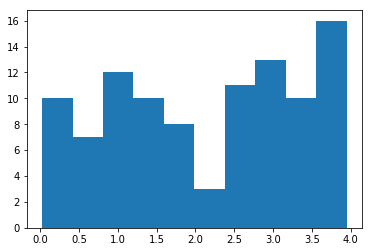

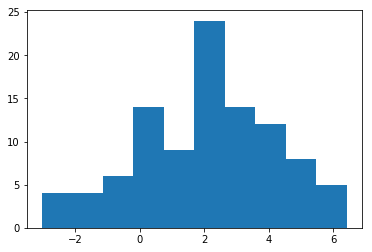

,t,q
count,100.000000,100.000000
mean,2.143755,2.974002
std,1.222630,1.554913
min,0.026791,-0.932946
25%,1.094915,1.904581
50%,2.375302,3.142409
75%,3.229677,4.101409
max,3.945845,6.757102


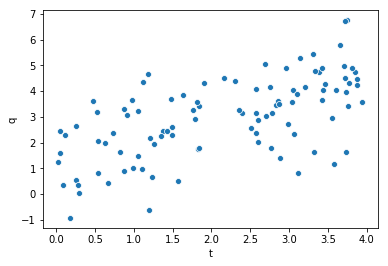

In [8]:
upper_chol = cholesky(corr_mat)

t = np.random.uniform(0, 4, 100)
plt.hist(t)
plt.show()

q = np.random.normal(2, 2, 100)
plt.hist(q)
plt.show()

com1 = pd.DataFrame({'t':t, 'q':q})

ans = com1 @ upper_chol
ans.columns = ['t', 'q']

sns.scatterplot(x="t", y="q", data=ans)

ans.corr()
ans.describe()


In [ ]:
from scipy.stats import multivariate_normal as mvn

In [124]:
df.describe()
cov = ans.corr()

In [125]:
scores = mvn.rvs(mean = [4.6, 4.8], cov=cov, size = 100)
print(cov)

scores = pd.DataFrame(scores)
scores.columns = ['t', 'q']
scores.corr()

          t         q
t  1.000000  0.995913
q  0.995913  1.000000


,t,q
t,1.000000,0.995238
q,0.995238,1.000000


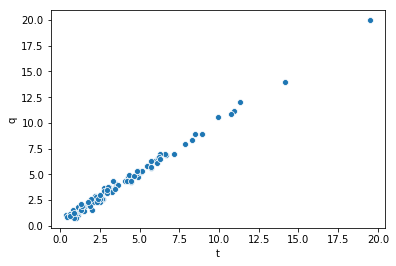

In [126]:
sns.scatterplot(x="t", y="q", data=ans)


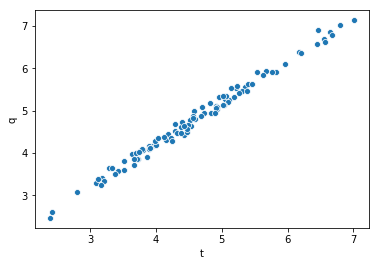

In [127]:
sns.scatterplot(x="t", y="q", data=scores)

In [4]:
df = pd.read_csv('social_class.csv')
df.head()

,"Population by County, Social Class, statistical indicator and Year",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,,,,2016.0
2,State,NaN,NaN,NaN
3,,1 Professional Workers,NaN,NaN
4,,,Population (Number),386648.0
